## import module

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(20)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(20)

## Define Hyper Parameter

In [3]:
EPOCHS = 50

## Training with Overfitting

### Define Network Structure

In [4]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(64, activation='relu')
        self.dense5 = tf.keras.layers.Dense(64, activation='softmax')
    
    def call(self, x, trainint=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return self.dense5(h)

### Model Creation

Native 방식을 사용하지 않고, keras를 사용해서 학습

In [5]:
model = MyModel()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [6]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5473 - accuracy: 0.8053 - val_loss: 0.4538 - val_accuracy: 0.8378
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3905 - accuracy: 0.8570 - val_loss: 0.3868 - val_accuracy: 0.8598
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3522 - accuracy: 0.8701 - val_loss: 0.4214 - val_accuracy: 0.8454
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3273 - accuracy: 0.8800 - val_loss: 0.3727 - val_accuracy: 0.8672
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3124 - accuracy: 0.8844 - val_loss: 0.3583 - val_accuracy: 0.8744
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2991 - accuracy: 0.8884 - val_loss: 0.3496 - val_accuracy: 0.8740
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.8918 - val_loss: 0.3462 - val_accuracy:

### Visualization

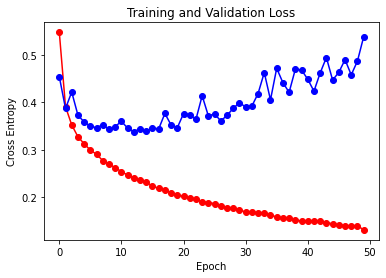

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')  # red
plt.plot(val_loss, 'bo-')  # blue
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

Training Loss는 지속적으로 감소하지만, Validation Loss는 특정 시점부터 증가한다

## Training with Early Stopping

### Early Stopping Callback

Callback :  
모델을 학습하는 과정에서, 한번 배치가 끝날 때나 시작할 때,  
Epoch 시작 전/후, Validation 시작 전/후, Evaluation 시작 전/후  
등의 시점에서 call 되면서 특정 동작을 할 수 있게 함

In [8]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
   # val_loss를 기준으로 판단, epoch 최소 10, verbose : 학습 과정에서 출력을 내주는 정도를 지정

### Model Training

In [9]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1343 - accuracy: 0.9482 - val_loss: 0.5112 - val_accuracy: 0.8827
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1347 - accuracy: 0.9494 - val_loss: 0.5014 - val_accuracy: 0.8840
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1301 - accuracy: 0.9510 - val_loss: 0.5167 - val_accuracy: 0.8813
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1325 - accuracy: 0.9493 - val_loss: 0.5315 - val_accuracy: 0.8806
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1302 - accuracy: 0.9506 - val_loss: 0.4878 - val_accuracy: 0.8860
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1309 - accuracy: 0.9502 - val_loss: 0.5262 - val_accuracy: 0.8852
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1296 - accuracy: 0.9514 - val_loss: 0.5212 - val_accuracy:

### Visualization

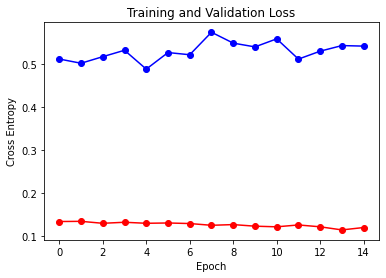

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')  # red
plt.plot(val_loss, 'bo-')  # blue
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

## Training with Drop-out

### Network Structure

In [11]:
class MyModel2(tf.keras.Model):
    def __init__(self):
        super(MyModel2, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')  
                         # 충분한 복잡도를 주기 위해 뉴런의 개수를 128로 지정
        self.dropout4 = tf.keras.layers.Dropout(0.5)
        self.dense5 = tf.keras.layers.Dense(64, activation='softmax')
    
    def call(self, x, trainint=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        h = self.dropout4(h)
        return self.dense5(h)

### Model Creation

In [12]:
model = MyModel2()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [13]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6240 - accuracy: 0.7822 - val_loss: 0.4457 - val_accuracy: 0.8353
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4091 - accuracy: 0.8542 - val_loss: 0.3887 - val_accuracy: 0.8592
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3687 - accuracy: 0.8680 - val_loss: 0.3725 - val_accuracy: 0.8674
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3483 - accuracy: 0.8731 - val_loss: 0.4032 - val_accuracy: 0.8548
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3271 - accuracy: 0.8798 - val_loss: 0.3841 - val_accuracy: 0.8677
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3179 - accuracy: 0.8840 - val_loss: 0.3872 - val_accuracy: 0.8673
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3070 - accuracy: 0.8870 - val_loss: 0.3623 - val_accuracy:

### Visualization

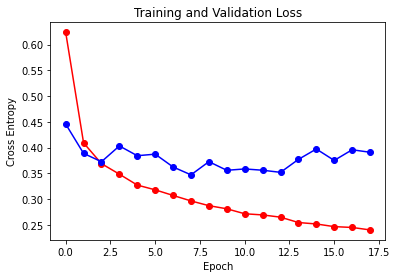

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')  # red
plt.plot(val_loss, 'bo-')  # blue
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()